# Mobile Price Dataset
## AIM:
In this Project, on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc, we want to predict the price range of the mobile.

## DATA description:
Input variables:

* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not

Output variables:
* price_range: the target value we want to estimate. There are four possible values:0,1,2,3.
### Note that the price range has only four possible values. Thus, this is a classification problem

## Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

## 1. Data loading
* We print the table head of the source data to check what kind of feature data has been included.
* Note that column 'index' is not regarded as a meaningful feature here.

In [2]:
data = pd.read_csv("data.csv").reset_index()
print("data shape is : ", data.shape)
data.head()

data shape is :  (2000, 22)


,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1


* It shows that there are 2,000 samples and each sample has 20 features and 1 target ('price_range')

* We further observe the statistical features of the source data by showing the mean, std, min, max, etc., statistical information as below

In [3]:
data.describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.505250,140.249000,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,577.494589,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.314272,35.399655,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.000000,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,499.750000,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,999.500000,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1499.250000,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,5.600000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* We also plot the feature distribution to observe the value distribution of each feature.

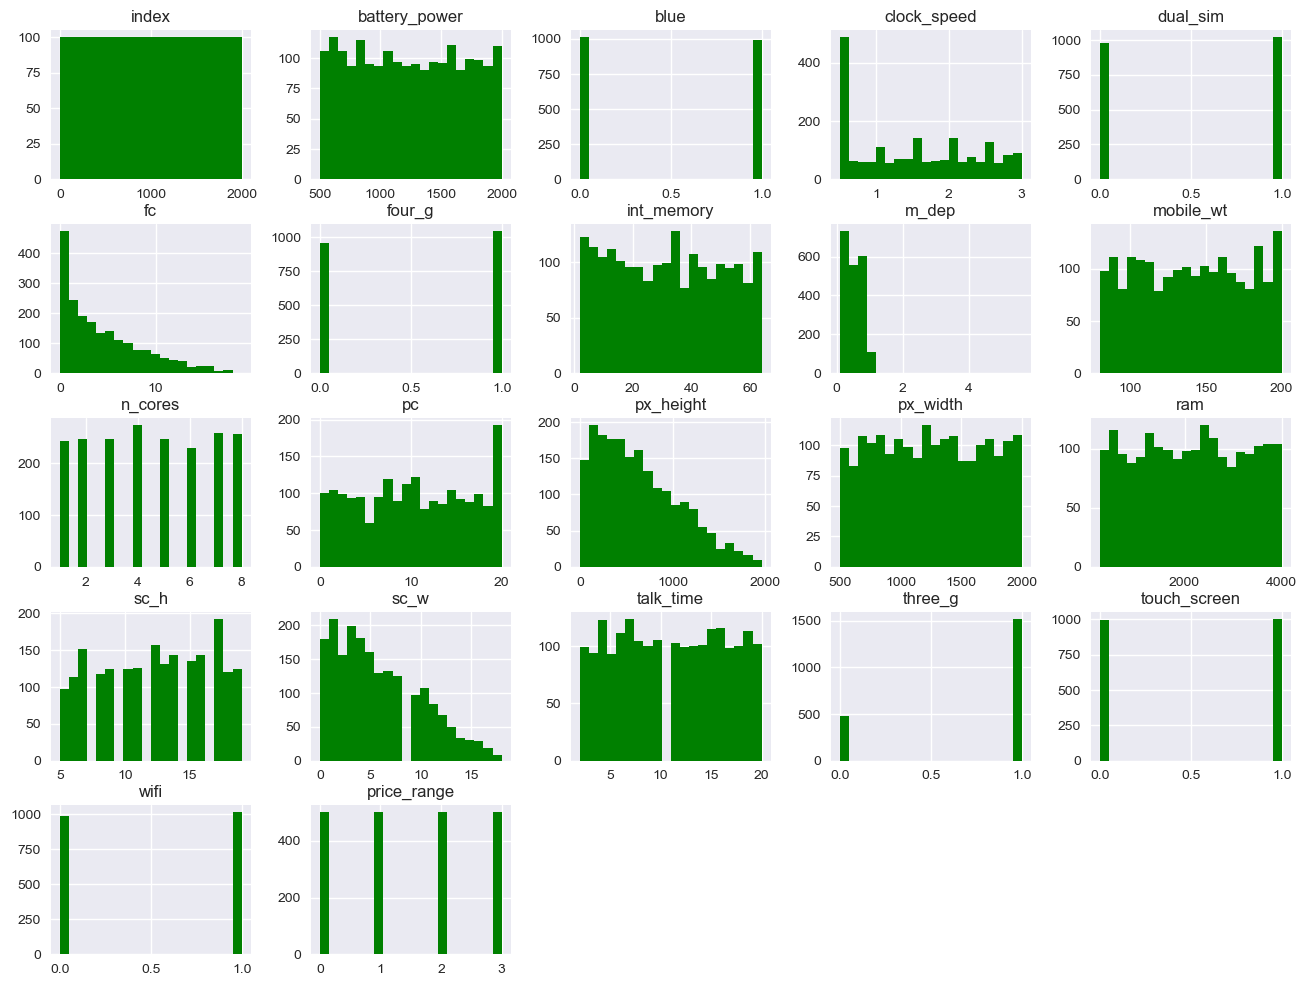

In [4]:
data.hist(bins=20 ,figsize=(16,12), color = 'Green')
plt.show()

* In particular, we plot the distribution of the target variable: Price range

Text(0.5, 1.0, 'Price Class Distribution \n (0: Range one || 1: Range two||2:Range three||3:Range Four)')

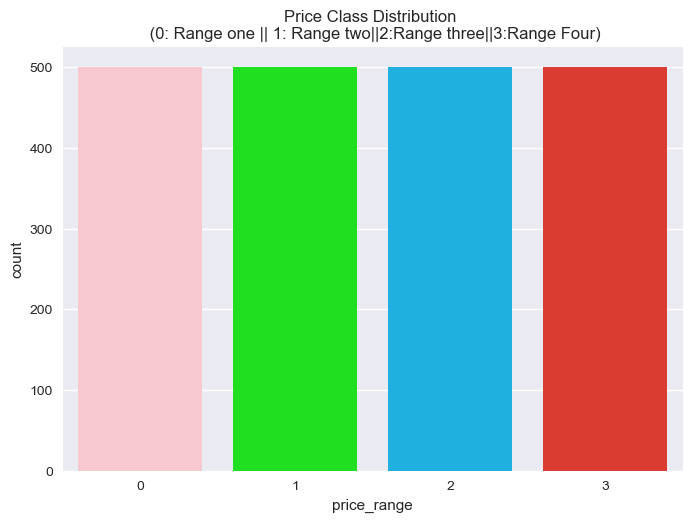

In [5]:
colors = ["#FFC0CB","#00FF00","#00BFFF","#F62217"]
sns.countplot(x='price_range',data=data, palette = colors)
plt.title('Price Class Distribution \n (0: Range one || 1: Range two||2:Range three||3:Range Four)',
          fontsize=12)

* There are four possible values of the price range with 0, 1, 2 and 3. From the distribution, we can find that the label idstribution is very balanced and even among four possible labels.

## Feature Selection

We first study the correlation between the mobile price range and other features.

In [6]:
data = data.drop(columns=['index'])
# We drop the 'index' column here since it's meaningless for prediction
correlation_matrix = data.corr()
print(correlation_matrix['price_range'])

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.001495
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64


Then we remove irrelevant features.

In [7]:
data = data.drop(columns=['clock_speed','mobile_wt','touch_screen'])

In [8]:
data.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,0.6,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,0.7,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,0.9,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,0.8,6,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,0.6,2,14,1208,1212,1411,8,2,15,1,0,1


## 2. Data Preprocessing

### 2.1 Data Normalisetion & Train Test Split

* The cleaned normalised dataset is split into train dataset and the test dataset and we need to randomly shuffle the data set

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.copy().drop(columns=['price_range'])
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X)
df_standardized = pd.DataFrame(df_standardized, columns=X.columns)

In [10]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
x_ex1 = df_standardized
y_ex1 = data.copy()['price_range']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.75),:]
x_test = x_ex1_array[int((len(y_ex1_array)+1)*0.75):,:]
y_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.75)]
y_test = y_ex1_array[int((len(y_ex1_array)+1)*0.75):]

## 3. Neural Network
* We will train a neural network model to predict the price range target variable based on the cleaned and normalised  dataset.

### 3.1 Model generation

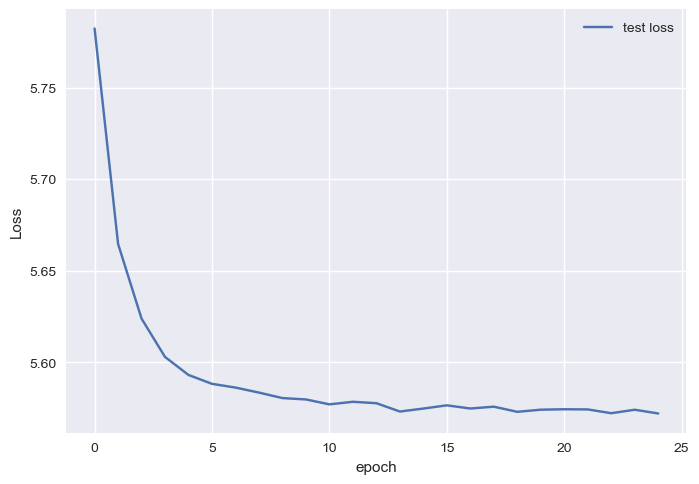

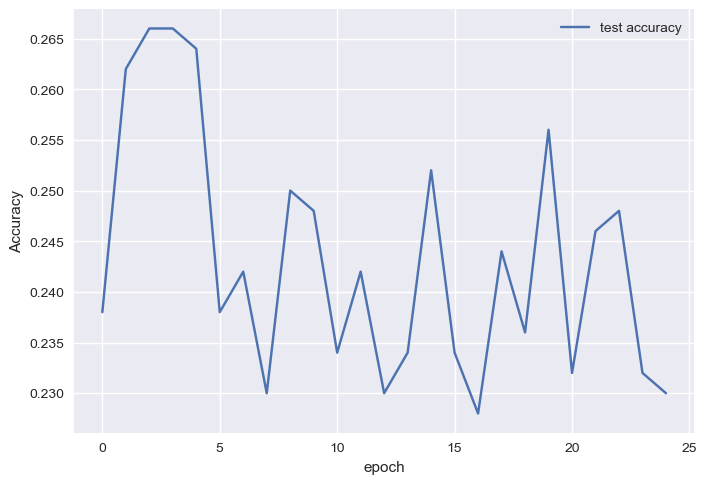

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone
from sklearn.metrics import log_loss


def my_logloss(true_label, predicted):
    b = np.zeros((true_label.size,true_label.max()+1))
    b[:,true_label] = 1
    N = predicted.shape[0]
    ce = -np.sum(b * np.log(predicted)) / N
    return ce

mlp = MLPClassifier(
    solver='sgd',
    activation='identity',
    random_state=42,
    hidden_layer_sizes=(20,10,5),
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=1,
)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = x_train.shape[0]
N_EPOCHS = 25
N_BATCH = 20
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
train_loss = []
test_loss = []

# epoch
epoch = 0
while epoch < N_EPOCHS:
    # shuffing
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    while True:
        # mini-batch
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(x_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

     # test record
    scores_test.append(mlp.score(x_test, y_test))
    y_pred = mlp.predict_proba(x_test)
    test_error = my_logloss(y_test, y_pred)
    test_loss.append(test_error)

    epoch += 1
# plot
plt.plot(test_loss,label='test loss')
plt.legend([ 'test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

# plot
plt.plot(scores_test,label='test accuracy')
plt.legend([ 'test accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()


* We firstly use the test loss and  accuracy to evaluate the performance of the trained neural network model.
* From evaluation results, we can observe that:
1) The model performance is not stable.
2) As the number of iterations increases, the loss continues to decrease, but the accuracy is fluctuated.

### 3.2 Model evaluation
* We further evaluate the model performance by using more metrics such as precision, recall and f1-score

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = mlp.predict(x_test)
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.19      0.23      0.21       123
           1       0.26      0.21      0.23       127
           2       0.25      0.28      0.27       125
           3       0.22      0.20      0.21       125

    accuracy                           0.23       500
   macro avg       0.23      0.23      0.23       500
weighted avg       0.23      0.23      0.23       500



[[28 21 37 37]
 [40 27 32 28]
 [39 28 35 23]
 [37 29 34 25]]


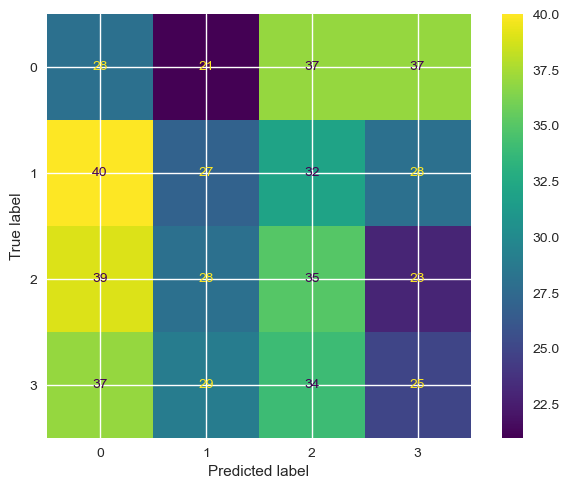

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=mlp.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()

## 4. Decision Tree
* Now, we train the second model, decision tree model, to predict the mobile price range, to see which model can provide better performance.

### 4.1 Model generation

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
)
tree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=5)

### 4.2 Test

[[28 21 37 37]
 [40 27 32 28]
 [39 28 35 23]
 [37 29 34 25]]


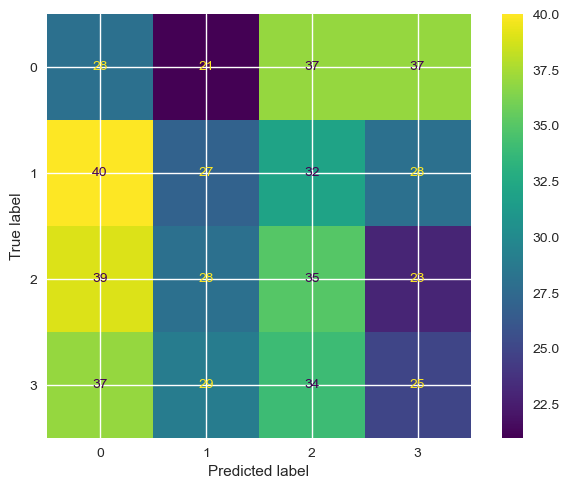

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=tree.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

In [16]:
from sklearn.metrics import classification_report

tree.fit(x_train,y_train)
y_true, y_pred = y_test , tree.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.27      0.28      0.27       123
           1       0.30      0.25      0.28       127
           2       0.26      0.29      0.27       125
           3       0.27      0.28      0.28       125

    accuracy                           0.27       500
   macro avg       0.28      0.27      0.27       500
weighted avg       0.28      0.27      0.27       500



* From the evaluation result of the decision tree model, its accuracy (27%) is slighlt better than that of the neural network model (23%).

### 4.3 Further exploration

Since these two models have a similar accuracy score on the test set, so we want to use another metric to compare them.

In [17]:
# In here, we use MSE to evaluate these two models
from sklearn.metrics import mean_squared_error

# NN's prediction
nn_test = mlp.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_test)
print(f"Neural Network's Mean Squared Error: {nn_mse}")

# DT's prediction
dt_test = tree.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_test)
print(f"Decision Tree's Mean Squared Error: {dt_mse}")

Neural Network's Mean Squared Error: 2.752
Decision Tree's Mean Squared Error: 2.492


* These two model's performance under MSE are quite similar and the gap is really small.
* From our comparison, we can assert that decision tree model is better and more powerful than that of the neural network model because decision tree achieves a higher model accuracy.